In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Load data
data=pd.read_csv('/content/sales_data.csv')
df=pd.DataFrame(data)

In [74]:
print(df)

           date     product     category   price  quantity  revenue
0      1/1/2022  Smartphone  Electronics   600.0      10.0   6000.0
1      1/1/2022      Laptop  Electronics  1200.0       5.0   6000.0
2      1/2/2022     T-Shirt     Clothing    20.0      50.0   1000.0
3      1/3/2022  Headphones  Electronics   100.0      20.0   2000.0
4      1/4/2022     T-Shirt     Clothing    20.0      25.0    500.0
..          ...         ...          ...     ...       ...      ...
364  12/27/2022       Watch  Accessories   150.0       5.0    750.0
365  12/28/2022        Coat     Clothing   100.0       5.0    500.0
366  12/29/2022  Headphones  Electronics   100.0      10.0   1000.0
367  12/30/2022  Smartphone  Electronics   600.0      11.0   6600.0
368  12/31/2022      Hoodie     Clothing    40.0      30.0   1200.0

[369 rows x 6 columns]


In [75]:
# Top 5 rows
df.head()

,date,product,category,price,quantity,revenue
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0
2,1/2/2022,T-Shirt,Clothing,20.0,50.0,1000.0
3,1/3/2022,Headphones,Electronics,100.0,20.0,2000.0
4,1/4/2022,T-Shirt,Clothing,20.0,25.0,500.0


In [76]:
# Last 5 rows
df.tail()

,date,product,category,price,quantity,revenue
364,12/27/2022,Watch,Accessories,150.0,5.0,750.0
365,12/28/2022,Coat,Clothing,100.0,5.0,500.0
366,12/29/2022,Headphones,Electronics,100.0,10.0,1000.0
367,12/30/2022,Smartphone,Electronics,600.0,11.0,6600.0
368,12/31/2022,Hoodie,Clothing,40.0,30.0,1200.0


In [77]:
# view datatypes
df.dtypes

,0
date,object
product,object
category,object
price,float64
quantity,float64
revenue,float64


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [79]:
# Checking Null values
df.isnull().sum()

,0
date,0
product,0
category,0
price,2
quantity,1
revenue,1


In [80]:
# View Null Values
df[df.isnull().any(axis=1)]

,date,product,category,price,quantity,revenue
96,4/5/2022,Smartwatch,Accessories,200.0,10.0,NaN
122,5/1/2022,Smartphone,Electronics,600.0,NaN,6600.0
193,7/11/2022,Watch,Accessories,NaN,15.0,2250.0
320,11/13/2022,Wallet,Accessories,NaN,35.0,1050.0


In [81]:
# Handle Null values
grp=df.groupby(['product','category'])['price'].mean()
print(grp)

product     category   
Backpack    Bags             50.0
            Bgas             50.0
Coat        Clothing        100.0
Headphones  Electronics     100.0
Hoodie      Clohting         40.0
            Clothing         40.0
Jeans       Clothing         50.0
Laptop      Electronics    1200.0
Smartphone  Electronics     600.0
Smartwatch  Accessories     200.0
Sneakers    Shoes            80.0
            Shoeses          80.0
Speaker     Electronics      80.0
T-Shirt     Clothing         20.0
Tablet      Electronics     400.0
Wallet      Accessories      30.0
Watch       Accessories     150.0
Name: price, dtype: float64


In [82]:
# Handling null values
df['price']=df.apply(lambda x: grp[x['product'],x['category']] if pd.isnull(x['price']) else x['price'],axis=1)

In [83]:
df.isnull().sum()

,0
date,0
product,0
category,0
price,0
quantity,1
revenue,1


In [84]:
df['quantity']=df.apply(lambda x: x['revenue']/x['price'] if pd.isnull(x['quantity']) else x['quantity'],axis=1)

In [85]:
df[df['revenue'].isnull()]

,date,product,category,price,quantity,revenue
96,4/5/2022,Smartwatch,Accessories,200.0,10.0,NaN


In [86]:
df['revenue']=df.apply(lambda x: x['price']*x['quantity'] if pd.isnull(x['revenue']) else x['revenue'],axis=1)

In [87]:
df.isnull().sum()

,0
date,0
product,0
category,0
price,0
quantity,0
revenue,0


# ***Now data have no missing values.***

In [88]:
# Statistic summary
df.describe(include='all')

,date,product,category,price,quantity,revenue
count,369,369,369,369.000000,369.000000,369.000000
unique,365,14,8,NaN,NaN,NaN
top,11/10/2022,Smartphone,Electronics,NaN,NaN,NaN
freq,2,82,130,NaN,NaN,NaN
mean,NaN,NaN,NaN,210.569106,14.555556,2060.514905
std,NaN,NaN,NaN,226.934800,8.586059,1908.335265
min,NaN,NaN,NaN,20.000000,3.000000,300.000000
25%,NaN,NaN,NaN,50.000000,8.000000,800.000000
50%,NaN,NaN,NaN,100.000000,12.000000,1200.000000
75%,NaN,NaN,NaN,200.000000,20.000000,2400.000000


In [89]:
# Checking duplicates
df[df.duplicated()]
df=df.drop_duplicates()

# ***Duplicate data Removed.***

In [90]:
# Correlation
df.corr(numeric_only=True)

,price,quantity,revenue
price,1.000000,-0.515890,0.914741
quantity,-0.515890,1.000000,-0.313805
revenue,0.914741,-0.313805,1.000000


In [91]:
df.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

<Axes: xlabel='product', ylabel='count'>

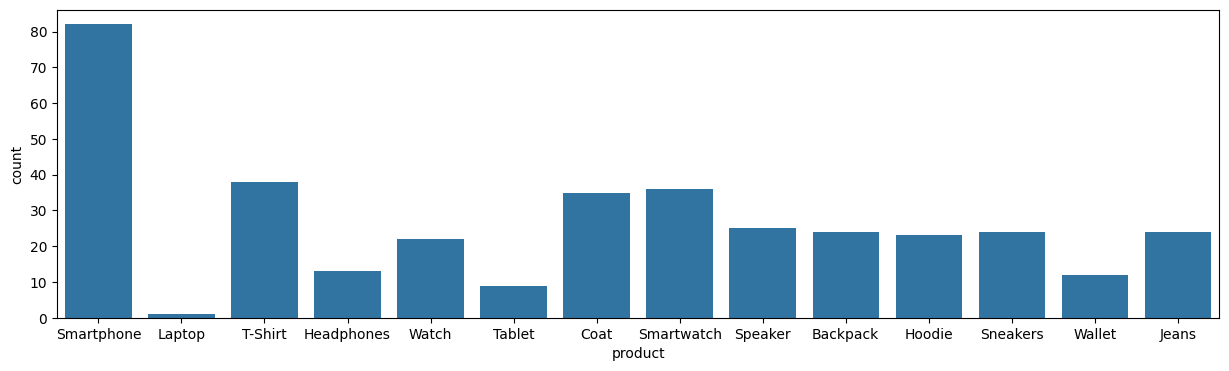

In [92]:
# checking frequency of each product
values=df['product'].value_counts()
fig=plt.figure(figsize=(15,4))
sns.countplot(x='product',data=df)

<Axes: xlabel='category', ylabel='count'>

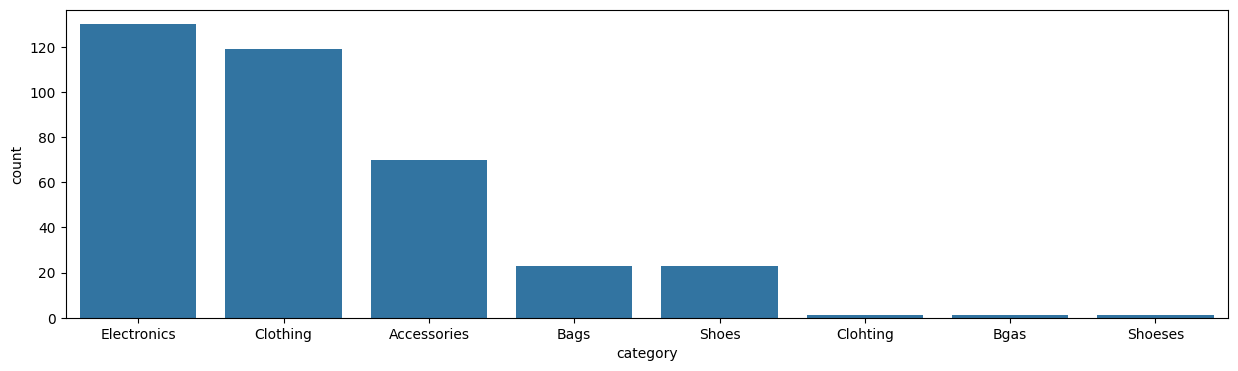

In [93]:
# checking product category distribution
values_1=df['category'].value_counts()
fig=plt.figure(figsize=(15,4))
sns.countplot(x='category',data=df)

In [94]:
df.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

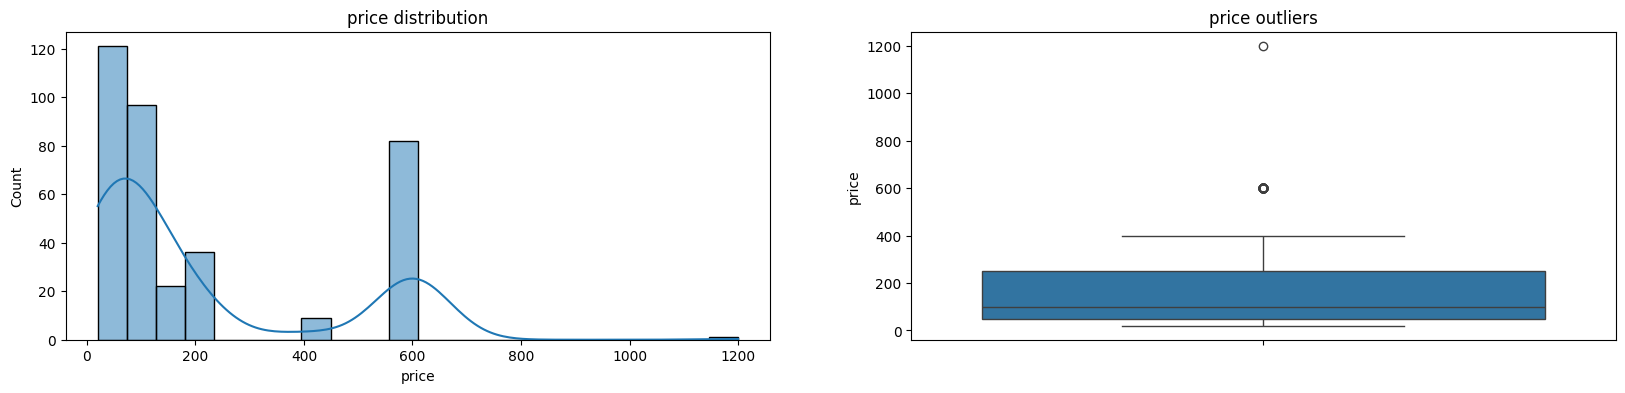

In [95]:
# Distribution and outliers for 'price'
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True)
plt.title('price distribution')

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.title('price outliers')

plt.show()


<Axes: ylabel='quantity'>

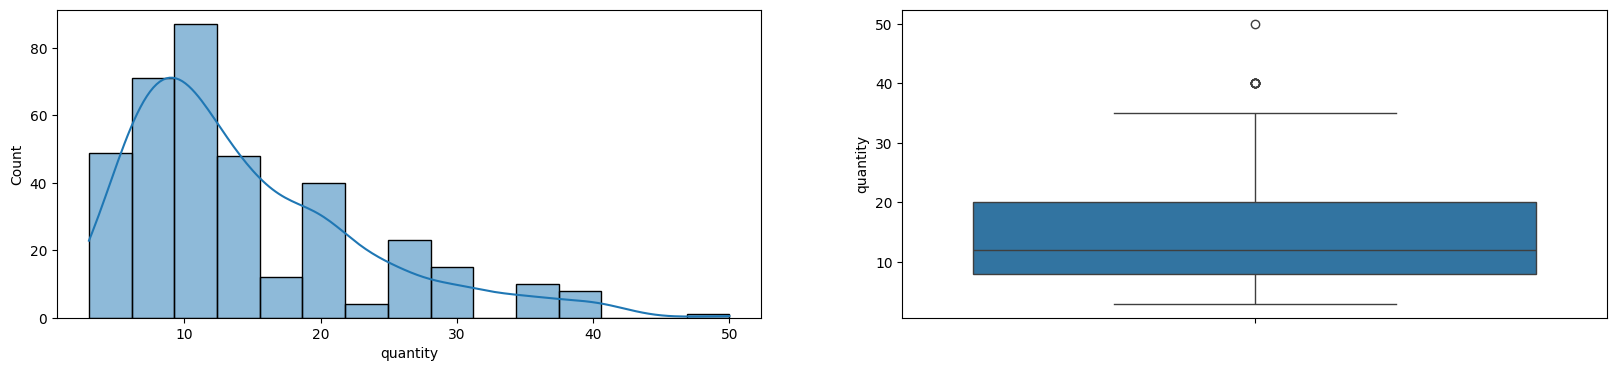

In [98]:
# quantity distribution and outliers
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(df['quantity'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(df['quantity'])



<Axes: ylabel='revenue'>

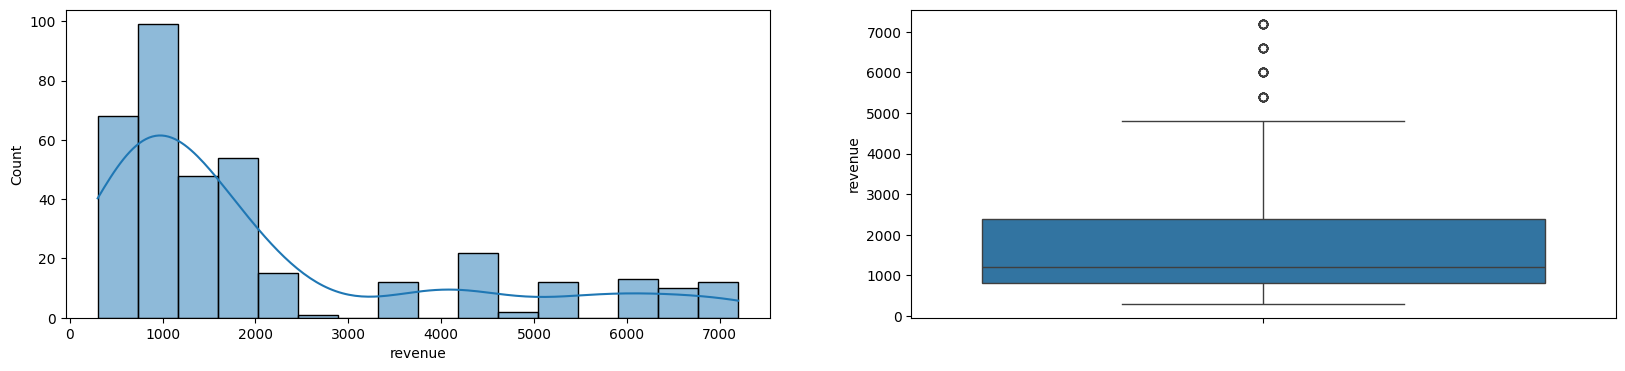

In [100]:
# revenue distribution and outliers
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(df['revenue'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(df['revenue'])

# **Although a few values in the 'price','quantity','revenue' columns appear as outliers, they are retained as they may represent valid bulk purchases.No data was removed to avoid loss of genuine transactional information.**

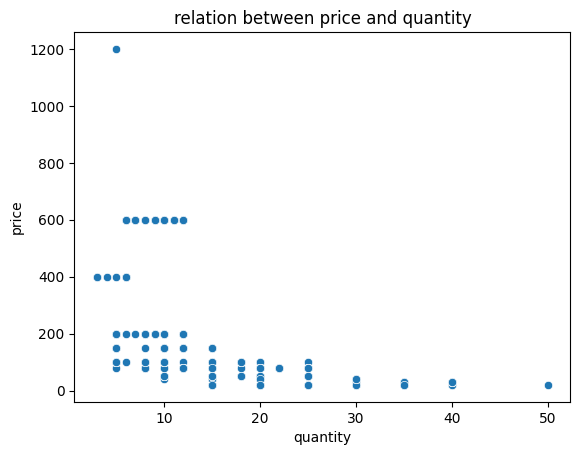

In [102]:
# relation between price and quantity

sns.scatterplot(x='quantity',y='price',data=df)
plt.title('relation between price and quantity')
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()

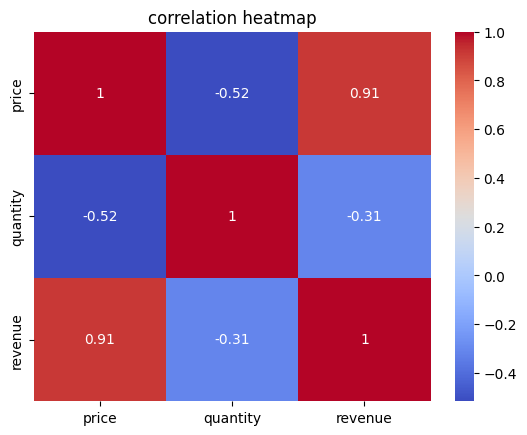

In [103]:
# correlation
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

Text(0, 0.5, 'price')

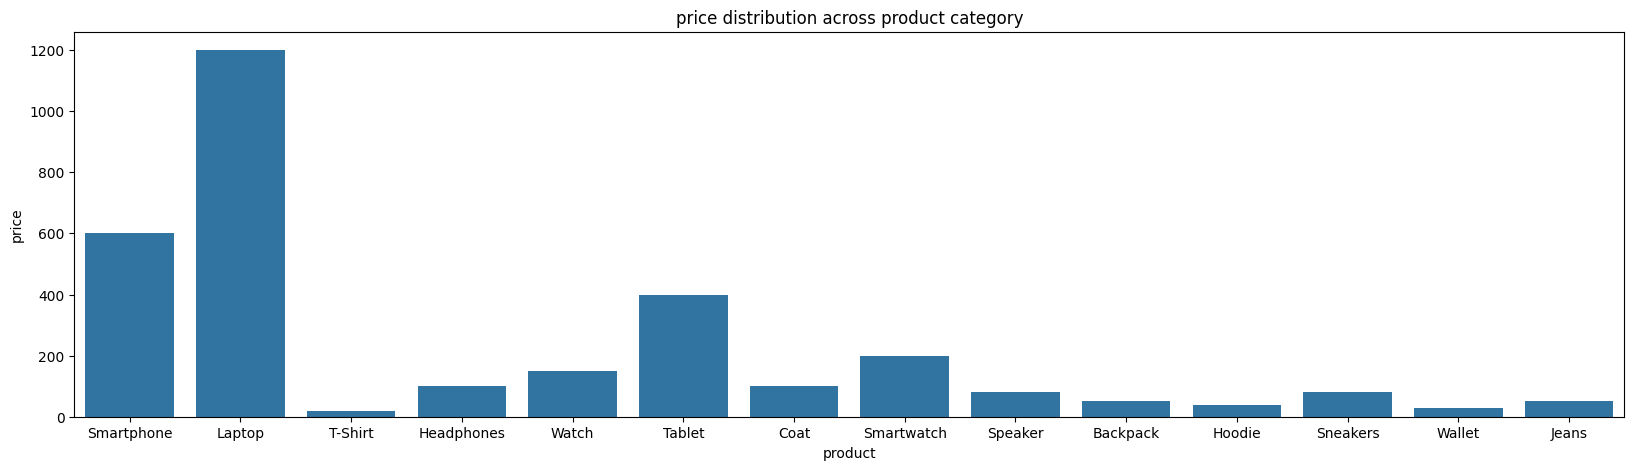

In [111]:
# price distribution across product category
plt.figure(figsize=(20,5))
sns.barplot(x='product',y='price',data=df)
plt.title('price distribution across product category')
plt.xlabel('product')
plt.ylabel('price')

<Figure size 2000x500 with 0 Axes>

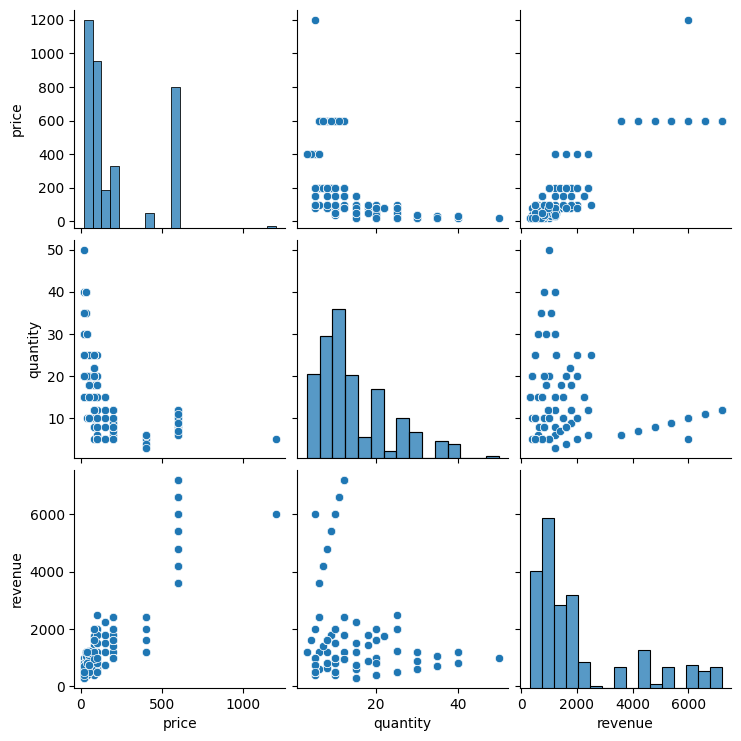

In [113]:
# Relation between price , quantity , revenue columns using pairplot
plt.figure(figsize=(20,5))
sns.pairplot(df[['price','quantity','revenue']])

Text(0, 0.5, 'revenue')

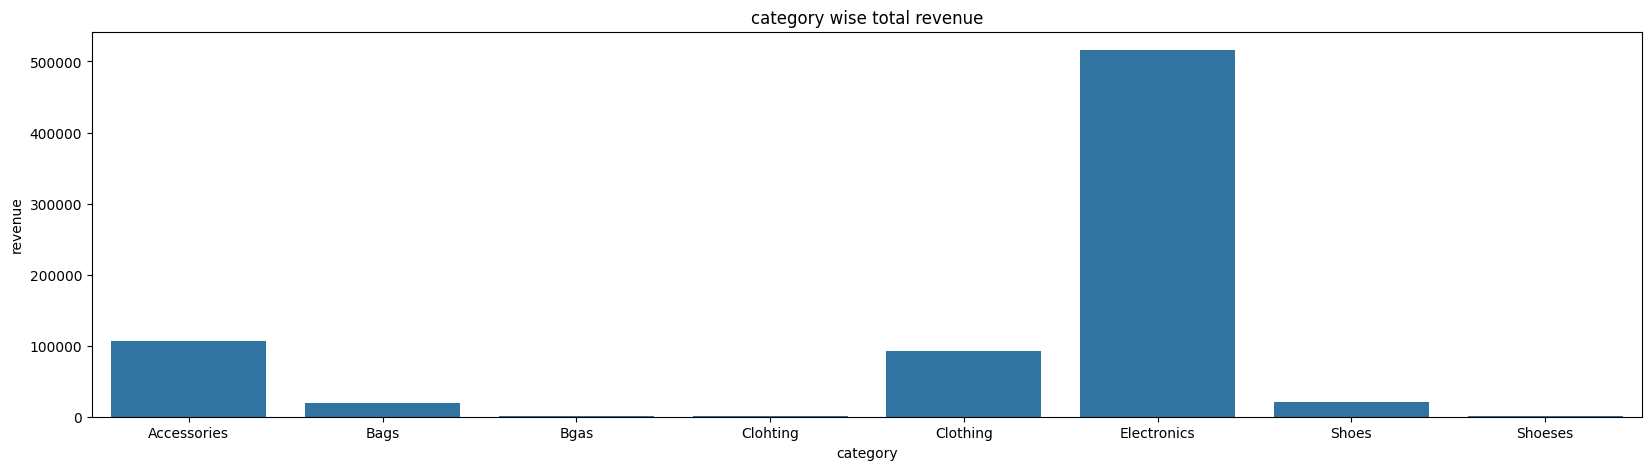

In [114]:
# category wise total revenue

grp2=df.groupby('category')['revenue'].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x='category',y='revenue',data=grp2)
plt.title('category wise total revenue')
plt.xlabel('category')
plt.ylabel('revenue')

# **📊 Business Insights for Stakeholders**

#** 1️⃣ Accessories are the top-selling category, generating the highest revenue among all product types.**

# ** 2️⃣ Wallets contribute steady sales and should be monitored for pricing consistency to maintain margins.**

# ** 3️⃣ There’s a clear positive trend: as both price and quantity increase, revenue also rises.**

# ** 4️⃣ A few products are priced higher, but they do not negatively impact total revenue, suggesting customers are willing to pay premium prices.**

# ** 5️⃣ The majority of sales volume comes from moderately priced items, indicating customer preference for mid-range products. **